## Linear Regression

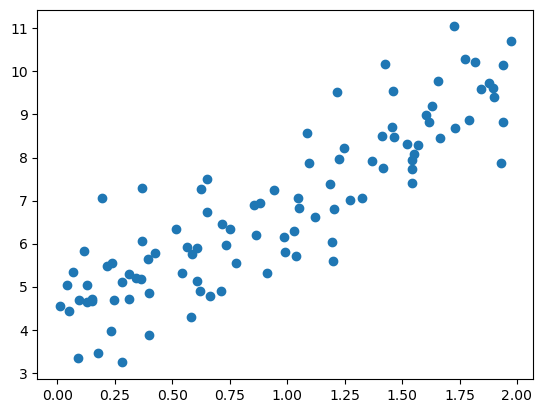

In [46]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)
plt.scatter(X, y)

### normal equation

In [51]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best # theta hat

array([[4.21509616],
       [2.77011339]])

In [52]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

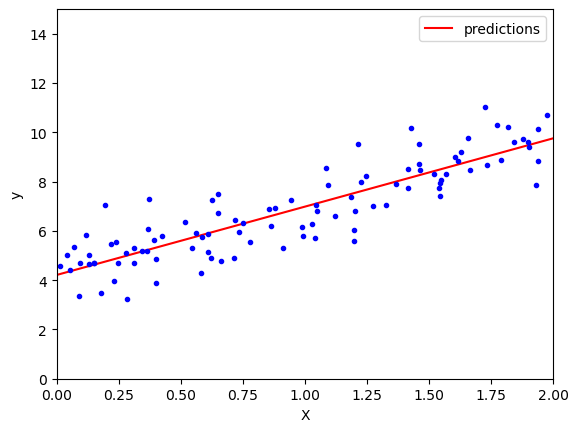

In [53]:
plt.plot(X_new, y_predict, 'r-', label='predictions')
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [54]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
lr.intercept_, lr.coef_

(array([4.21509616]), array([[2.77011339]]))

In [55]:
lr.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [56]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd # singular value decomposition

array([[4.21509616],
       [2.77011339]])

In [57]:
# pseudoinverse
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

### batch gradient descent (use the whole training set to compute the gradients at every step)

In [69]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients

theta

array([[4.21509616],
       [2.77011339]])

### stochastic gradient descent (pick random instance in the training set at every step)

In [73]:
n_epochs = 50
t0, t1 = 5, 50
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients
        
theta

array([[4.21337283],
       [2.77947643]])

In [75]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd.fit(X, y.ravel())
sgd.intercept_, sgd.coef_

(array([4.29775192]), array([2.83288054]))

### mini-batch gradient descent (compute the gradients on small random sets of instances)

## Polynomial Regression

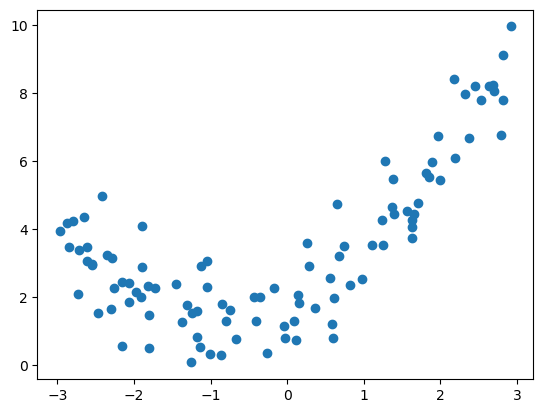

In [78]:
np.random.seed(42)
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)
plt.scatter(X,y)

In [79]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [80]:
lr =  LinearRegression()
lr.fit(X_poly, y)
lr.intercept_, lr.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

### learning curve

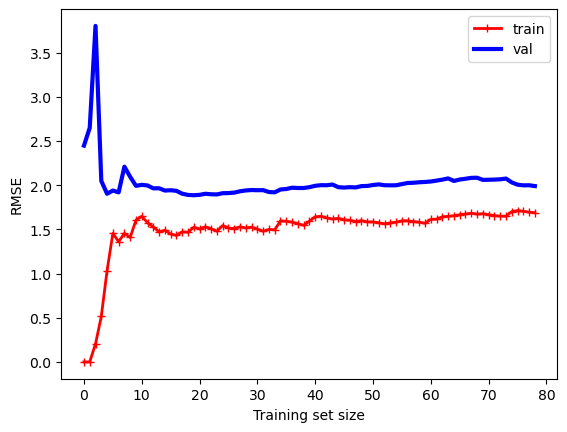

In [93]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [],[]
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
        val_errors.append(mean_squared_error(y_val, y_val_pred))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.legend()

lr = LinearRegression()
plot_learning_curves(lr, X, y) # both reaches plateau
# adding more training examples will not improve, need to use a more complex model

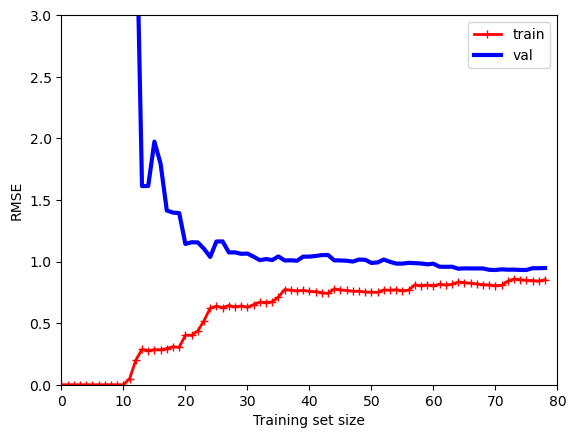

In [112]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lr', LinearRegression())
])
plt.axis([0, 80, 0, 3])
plot_learning_curves(polynomial_regression, X, y)

## Regularized Linear Models (constraining the weights)

### Ridge Regression (half the square of the l2 norm)

In [126]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

# using matrix factorization technique
ridge = Ridge(alpha=1, solver='cholesky')
ridge.fit(X, y)

# using Stochastic Gradient Descent
sgd = SGDRegressor(penalty='l2', max_iter=1000, tol=1e-3)
sgd.fit(X, y.ravel())
ridge.predict([[1.5]]), sgd.predict([[1.5]])

(array([[1.55071465]]), array([1.46543286]))

### Lasso Regression (l1 norm)

In [127]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

sgd = SGDRegressor(penalty='l1', max_iter=1000, tol=1e-3)
sgd.fit(X, y.ravel())
lasso.predict([[1.5]]), sgd.predict([[1.5]])

(array([1.53788174]), array([1.46938541]))

### Elastic Net (between ridge and lasso with ratio r [r=0 ridge, r=1 lasso])

In [128]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=0.1, l1_ratio=0.5)
en.fit(X, y)
en.predict([[1.5]])

array([1.54333232])

### early stopping (stop training as soon as the validation error reaches the min)

In [133]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
    ('poly_features',PolynomialFeatures(degree=90, include_bias = False)),
    ('std_scaler', StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd = SGDRegressor(max_iter = 1, tol = -np.infty, warm_start=True, penalty = None, learning_rate = 'constant', eta0 = 0.0005)

train_errors, val_errors = [], []
for epoch in range(500):
    sgd.fit(X_train_poly_scaled, y_train)
    y_train_pred = sgd.predict(X_train_poly_scaled)
    y_val_pred = sgd.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    val_errors.append(mean_squared_error(y_val, y_val_pred))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

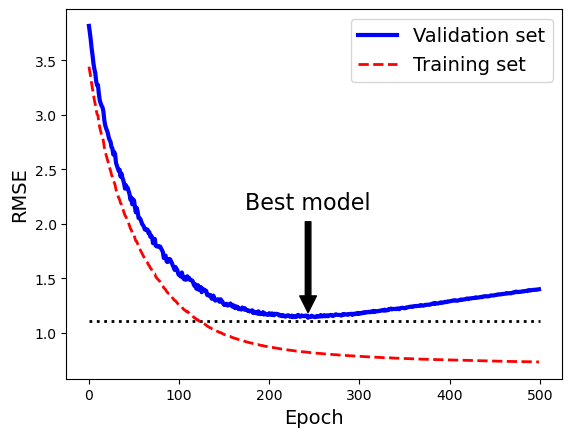

In [134]:
# draw plot
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, 500], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

## Logistic Regression

In [136]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

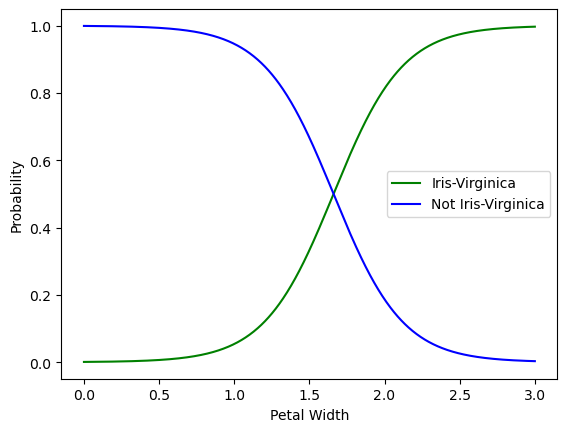

In [140]:
X = iris['data'][:, 3:] # petal width
y = (iris['target']==2).astype(np.int64) # 1 if Iris-Virginica, else 0

from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X, y)

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_prob = log.predict_proba(X_new)
plt.plot(X_new, y_prob[:, 1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_prob[:, 0], 'b-', label='Not Iris-Virginica')
plt.legend()
plt.xlabel('Petal Width')
plt.ylabel('Probability')
plt.show()

In [143]:
decision_boundary = X_new[y_prob[:, 1] >= 0.5][0]
decision_boundary

array([1.66066066])

In [144]:
log.predict([[1.7], [1.5]])

array([1, 0], dtype=int64)

### Softmax Regression

In [145]:
X = iris['data'][:, (2,3)] # petal length, petal width
y = iris['target']

softmax = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax.fit(X, y)

softmax.predict([[5,2]]) # Iris-Virginica

array([2])

In [146]:
softmax.classes_

array([0, 1, 2])

In [148]:
softmax.predict_proba(([[5,2]]))

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])